# Picking the "right" number of topics for a scikit-learn topic model

When you ask a topic model to find topics in documents for you, you only need to provide it with one thing: a number of topics to find. Somehow that one little number ends up being a lot of trouble! Let's figure out best practices for finding a good number of topics.

<p class="reading-options">
  <a class="btn" href="/text-analysis/choosing-the-right-number-of-topics-for-a-scikit-learn-topic-model">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/text-analysis/notebooks/Choosing the right number of topics for a scikit-learn topic model.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Choosing the right number of topics for a scikit-learn topic model.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

### Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.
* **state-of-the-union.csv:** State of the Union addresses - each presidential address from 1970 to 2012


In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv -P data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# These styles look nicer than default pandas
plt.style.use('ggplot')

# We'll be able to see more text at once
pd.set_option("display.max_colwidth", 100)

## Our dataset

We'll use the same dataset of State of the Union addresses as in our [last exercise](/text-analysis/introduction-to-topic-modeling/).

In [2]:
# Read in our data
speeches = pd.read_csv("data/state-of-the-union.csv")

# Remove non-word characters, so numbers and ___ etc
speeches.content = speeches.content.str.replace("[^A-Za-z ]", " ")

speeches.sample(5)

,year,content
22,1811,State of the Union AddressJames MadisonNovember Fellow Citizens of the Senate and House o...
88,1877,State of the Union AddressRutherford B HayesDecember Fellow Citizens of the Senate and H...
117,1906,State of the Union AddressTheodore RooseveltDecember To the Senate and House of Represent...
16,1805,State of the Union AddressThomas JeffersonDecember The Senate and House of Representative...
52,1841,State of the Union AddressJohn TylerDecember To the Senate and House of Representatives o...


### Vectorizing our data

We'll also use the same vectorizer as last time - a stemmed TF-IDF vectorizer that requires each term to appear at least 5 terms, but no more frequently than in half of the documents.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import Stemmer

# English stemmer from pyStemmer
stemmer = Stemmer.Stemmer('en')

analyzer = TfidfVectorizer().build_analyzer()

# Override TfidfVectorizer
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords(analyzer(doc))

In [4]:
vectorizer = StemmedTfidfVectorizer(stop_words='english', min_df=5, max_df=0.5)
matrix = vectorizer.fit_transform(speeches.content)

words_df = pd.DataFrame(matrix.toarray(),
                        columns=vectorizer.get_feature_names())
words_df.head()

,abal,abalanc,abandon,abat,abdic,abett,abey,abhorr,abid,abil,...,yourfavor,youth,youto,youwil,yukon,zeal,zealand,zealous,zero,zone
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.082383,0.0,0.00000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.061166,0.0,0.0
3,0.0,0.0,0.0,0.071243,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.04508,0.0,0.062934,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0


### Building our model

Previously we used **NMF** (also known as **LSI**) for topic modeling. It seemed to work okay! We asked for **fifteen topics.**

In [5]:
from sklearn.decomposition import NMF

# Use NMF to look for 15 topics
n_topics = 15
model = NMF(n_components=n_topics)
model.fit(matrix)

# Print the top 10 words
n_words = 10
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: island cuba arbitr june spain pension award confer consular commission
Topic 1: program billion today goal budget achiev area level farm percent
Topic 2: ve job tonight budget cut ll school spend don deficit
Topic 3: spain coloni franc articl intercours tribe minist port navig commenc
Topic 4: terrorist iraq iraqi terror tonight al regim afghanistan qaeda fight
Topic 5: fight enemi japanes today democraci victori tank plane task attack
Topic 6: mexico texa mexican oregon california annex minist articl steamer loan
Topic 7: method relief cent veteran board farmer farm tariff depress committe
Topic 8: silver gold currenc note circul coinag cent bond coin speci
Topic 9: soviet communist atom threat aggress ve missil korea weapon ii
Topic 10: militia british enemi council tribe whilst decre port regular neutral
Topic 11: gentlemen commission amiti satisfact articl burthen militia prospect majesti hostil
Topic 12: corpor interst forest island philippin railroad deal class supervis 

But how do we know we don't need **twenty-five labels** instead of just fifteen?

In [6]:
# Use NMF to look for 25 topics
n_topics = 25
model = NMF(n_components=n_topics)
model.fit(matrix)

# Print the top 10 words per topic
n_words = 10
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: silver cent gold june pension island export bond amount commission
Topic 1: program billion job percent budget nuclear oil cut today achiev
Topic 2: ve job tonight ll spend deficit cut don budget dream
Topic 3: program farm billion budget communist area veteran atom farmer level
Topic 4: terrorist iraq iraqi terror tonight al regim afghanistan qaeda fight
Topic 5: fight japanes enemi victori tank plane alli nazi german job
Topic 6: mexico texa mexican oregon california annex minist articl steamer mail
Topic 7: method board consolid cent committe veteran farmer project confer relief
Topic 8: currenc gold note speci circul paper silver deposit exchang metal
Topic 9: soviet communist atom threat missil aggress challeng weapon ruler ii
Topic 10: enemi british militia lake savag whilst hostil victori captain tribe
Topic 11: gentlemen commission amiti articl satisfact burthen militia prospect majesti croix
Topic 12: democraci today democrat group modern recoveri unemploy dictatorshi

I mean yeah, that honestly looks even better! These topics all seem to make sense. **Should we go even higher?**

## Comparing topic models

Scikit-learn comes with a magic thing called `GridSearchCV`. Any time you can't figure out the "right" combination of options to use with something, you can feed them to `GridSearchCV` and it will _try them all_. After it's done, it'll check the score on each to let you know the best combination.

We have a little problem, though: **NMF can't be scored** (at least in scikit-learn!). Because our model can't give us a number that represents how well it did, we can't compare it to other models, which means the only way to differentiate between 15 topics or 20 topics or 30 topics is _how we feel about them_. 

**This is not good!** We want to be able to point to a number and say, "look! we did it right!" and have everyone nod their head in agreement.

Fortunately, though, there's a topic model that we haven't tried yet! **LDA**, a.k.a. latent Dirichlet allocation. Let's sidestep `GridSearchCV` for a second and see if LDA can help us.

### Introducing LDA

LDA is another topic model that we haven't covered yet _because it's so much slower than NMF_. Even if it's better it's just painful to sit around for minutes waiting for our computer to give you a result, when NMF has it done in under a second.

With that complaining out of the way, **let's give LDA a shot.** The code looks almost exactly like NMF, we just use something else to build our model.

There's one big difference: **LDA has TF-IDF built in, so we need to use a `CountVectorizer` as the vectorizer instead of a `TfidfVectorizer`**. If you don't do this your results will be _tragic_.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import Stemmer

# English stemmer from pyStemmer
stemmer = Stemmer.Stemmer('en')

analyzer = CountVectorizer().build_analyzer()

# Override TfidfVectorizer
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords(analyzer(doc))

In [8]:
vectorizer = StemmedCountVectorizer(stop_words='english', min_df=5, max_df=0.5)
matrix = vectorizer.fit_transform(speeches.content)

words_df = pd.DataFrame(matrix.toarray(),
                        columns=vectorizer.get_feature_names())
words_df.head()

,abal,abalanc,abandon,abat,abdic,abett,abey,abhorr,abid,abil,...,yourfavor,youth,youto,youwil,yukon,zeal,zealand,zealous,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> We're going to use `%%time` at the top of the cell to see how long this takes to run. Just remember that NMF took all of a second.

In [9]:
%%time

from sklearn.decomposition import LatentDirichletAllocation

# Use LDA to look for 15 topics
n_topics = 15
model = LatentDirichletAllocation(n_components=n_topics)
model.fit(matrix)

# Print the top 10 words per topic
n_words = 10
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: tariff bond articl wool taxat consum sheep accumul cloth inmanufactur
Topic 1: program billion achiev today area budget level goal farm task
Topic 2: british minist council decre instruct port militia statement neutral repeal
Topic 3: spain island minist june port articl commission mexico british gold
Topic 4: dime governmentth anymor thanthat variat thisstat practiceof dismantl theabsenc dozen
Topic 5: cent method confer tariff board june relief statut export arbitr
Topic 6: ministri commission arrang explan ascertain extern shewn chamber recal tribe
Topic 7: mexico texa mexican enemi minist tribe british spain articl hostil
Topic 8: gold note silver currenc bond circul amount coinag coin plain
Topic 9: corpor forest island interst class railroad confer deal bodi judg
Topic 10: franc paper exceed theconstitut intercours navig mind currenc class evil
Topic 11: tariff island irrig farmer undertak cabl race deal philippin flood
Topic 12: job tonight budget school ve cut spend ch

Those results look great, and ten seconds isn't so bad! The problem comes when you have **larger data sets**, so we really did a good job picking something with under 300 documents. Let's see how our **topic scores** look for each document.

In [10]:
# Convert our counts into numbers
amounts = model.transform(matrix) * 100

# Set it up as a dataframe
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head(2)

,topic_tariff_bond_articl,topic_program_billion_achiev,topic_british_minist_council,topic_spain_island_minist,topic_dime_governmentth_anymor,topic_cent_method_confer,topic_ministri_commission_arrang,topic_mexico_texa_mexican,topic_gold_note_silver,topic_corpor_forest_island,topic_franc_paper_exceed,topic_tariff_island_irrig,topic_job_tonight_budget,topic_soviet_communist_democraci,topic_gentlemen_princip_havebeen
0,0.043011,0.043011,0.043011,0.043011,0.043011,0.043011,0.043011,42.843154,0.043011,0.043011,56.597706,0.043011,0.043011,0.043011,0.043011
1,0.033168,0.033168,6.869618,38.497429,0.033167,0.033168,0.033168,16.260945,0.033168,0.033168,38.007164,0.033168,0.033168,0.033168,0.033168


Uh, hm, that's kind of weird. lots of really low numbers, and then it jumps up super high for some topics. How's it look graphed?

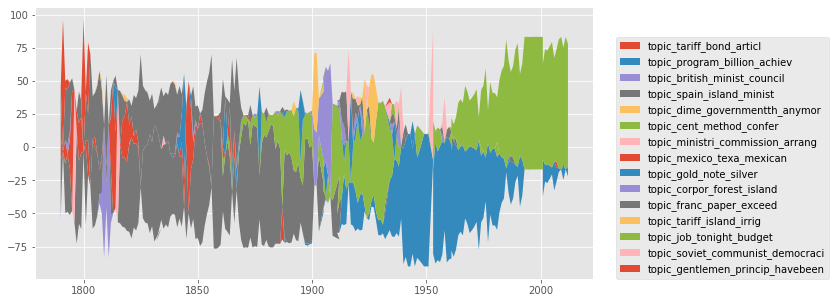

In [11]:
x_axis = speeches.year
y_axis = topics

fig, ax = plt.subplots(figsize=(10,5))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

Ouch. Looks like LDA doesn't like having topics shared in a document, while NMF was all about it. Let's keep on going, though!

> Spoiler: It gives you different results every time, but this graph always looks wild and blocky.

### Using GridSearchCV to pick the best number of topics

We'll need to build a dictionary for `GridSearchCV` to explain all of the options we're interested in changing, along with what they should be set to.

How many topics? Who knows! Somewhere between 15 and 60, maybe? We'll feed it a list of all of the different values we might set `n_components` to be.

We can also change the `learning_decay` option, which does Other Things That Change The Output. That's capitalized because we'll just treat it as fact instead of something to be investigated.

> The learning decay doesn't actually have an agreed-upon default value! In scikit-learn it's at `0.7`, but in [Gensim](https://radimrehurek.com/gensim/) it uses `0.5` instead.

Remember that `GridSearchCV` is going to try **every single combination**. For example, let's say you had the following:

```python
search_params = {
  'n_components': [20, 40, 60],
  'learning_decay': [.5, .7]
}
```

It builds, trains and scores a separate model for each combination of the two options, leading you to six different runs:

|n_components|learning_decay|
|---|---|
|20|0.5|
|20|0.7|
|40|0.5|
|40|0.7|
|60|0.5|
|60|0.7|

That means that if your LDA is slow, **this is going to be much much slower**. You might need to walk away and get a coffee while it's working its way through.

In [16]:
%%time

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Options to try with our LDA
# Beware it will try *all* of the combinations, so it'll take ages
search_params = {
  'n_components': [5, 10, 15, 20, 25, 30],
  'learning_decay': [.5, .7]
}

# Set up LDA with the options we'll keep static
model = LatentDirichletAllocation(learning_method='online')

# Try all of the options
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=1)
gridsearch.fit(matrix)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best Model's Params:  {'learning_decay': 0.7, 'n_components': 5}
Best Log Likelihood Score:  -511776.57894508244
CPU times: user 6.98 s, sys: 500 ms, total: 7.48 s
Wall time: 3min 2s


Great, we've been presented with the best option:

```
Best Model's Params:  {'learning_decay': 0.7, 'n_components': 5}
```

Let's see what it looks like.

In [18]:
%%time

from sklearn.decomposition import LatentDirichletAllocation

# Use LDA to look for 5 topics
n_topics = 5
model = LatentDirichletAllocation(learning_method='online', n_components=n_topics, learning_decay=0.5)
model.fit(matrix)

# Print the top 10 words per topic
n_words = 10
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: program billion area today budget achiev farm level soviet task
Topic 1: june gold island note spain silver cent bond amount cuba
Topic 2: mexico minist articl port british tribe franc deem intercours texa
Topic 3: method confer tariff corpor cent deal board island farmer relief
Topic 4: job tonight program budget school ve cut today spend percent
CPU times: user 8.05 s, sys: 522 ms, total: 8.57 s
Wall time: 6.65 s


Might as well graph it while we're at it.

In [19]:
# Convert our counts into numbers
amounts = model.transform(matrix) * 100

# Set it up as a dataframe
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head(2)

,topic_program_billion_area,topic_june_gold_island,topic_mexico_minist_articl,topic_method_confer_tariff,topic_job_tonight_program
0,0.131448,0.131410,99.475122,0.130871,0.131149
1,0.101089,0.101557,99.593546,0.101684,0.102124


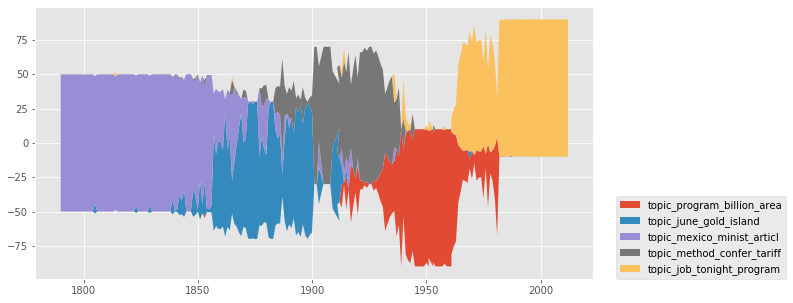

In [20]:
x_axis = speeches.year
y_axis = topics

fig, ax = plt.subplots(figsize=(10,5))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

While that makes perfect sense (I guess), **it just doesn't feel right.** Even trying fifteen topics looked better than that.

In [21]:
%%time

from sklearn.decomposition import LatentDirichletAllocation

# Use LDA to look for 15 topics
n_topics = 15
model = LatentDirichletAllocation(n_components=n_topics)
model.fit(matrix)

# Print the top 10 words per topic
n_words = 10
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: job tonight budget school ve cut today spend program challeng
Topic 1: andveri onal beprepar afair ofwhom todevis templ knit toafford toaddress
Topic 2: vietnam tonight tri achiev program billion south goal crime budget
Topic 3: spain slave kansa minist articl slaveri spanish british cuba south
Topic 4: terrorist iraq fight terror tonight weapon enemi attack iraqi women
Topic 5: wool financi method recoveri democraci unemploy relief tariff emerg railway
Topic 6: program billion area budget achiev today level soviet percent task
Topic 7: iraq qaeda troop iraqi enemi al terrorist fight empow surg
Topic 8: mexico texa minist japan currenc annex consol exhibit twenti regret
Topic 9: andveri onal beprepar afair ofwhom todevis templ knit toafford toaddress
Topic 10: corpor method confer island deal farmer cent interst tariff forest
Topic 11: franc minist articl intercours injuri tribe paper british currenc commenc
Topic 12: farm princip instead legislatur guard recess navig wealth r

Right? They seem pretty reasonable, even if the graph looked horrible because LDA doesn't like to share. And hey, **maybe NMF wasn't so bad after all.** Just because we can't score it doesn't mean we can't enjoy it.

In [23]:
%%time

# Use LDA to look for 15 topics
n_topics = 15
model = NMF(n_components=n_topics)
model.fit(matrix)

# Print the top 10 words per topic
n_words = 10
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: franc minist intercours articl port tribe navig deem injuri british
Topic 1: program area soviet nuclear oil budget percent initi women billion
Topic 2: mexico texa mexican minist annex enemi loan prosecut articl rio
Topic 3: job tonight school ve cut budget challeng today centuri spend
Topic 4: gold note silver bond currenc circul financi amount coinag retir
Topic 5: program billion budget veteran level food percent agenc worker loan
Topic 6: island corpor philippin immigr railroad chines forest class china doctrin
Topic 7: statut compani wool combin cent tariff canal board postal corpor
Topic 8: island cuba spain spanish juli june april gold joint novemb
Topic 9: cent june pension method export silver commission amount tariff mail
Topic 10: panama canal revolut isthmus colombia method shown island june board
Topic 11: fight enemi attack soviet communist weapon alli iraq terrorist today
Topic 12: kansa june slave slaveri whilst vote mexico minist california british
Topic 13: 

Oof, and so fast!

## What do we mean by the "right number?"

In the end, our biggest question is actually: **what in the world are we even doing topic modeling for?** 

## Review

TODO

## Discussion topics

TODO